In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Python for ML/08-Linear-Regression-Models/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


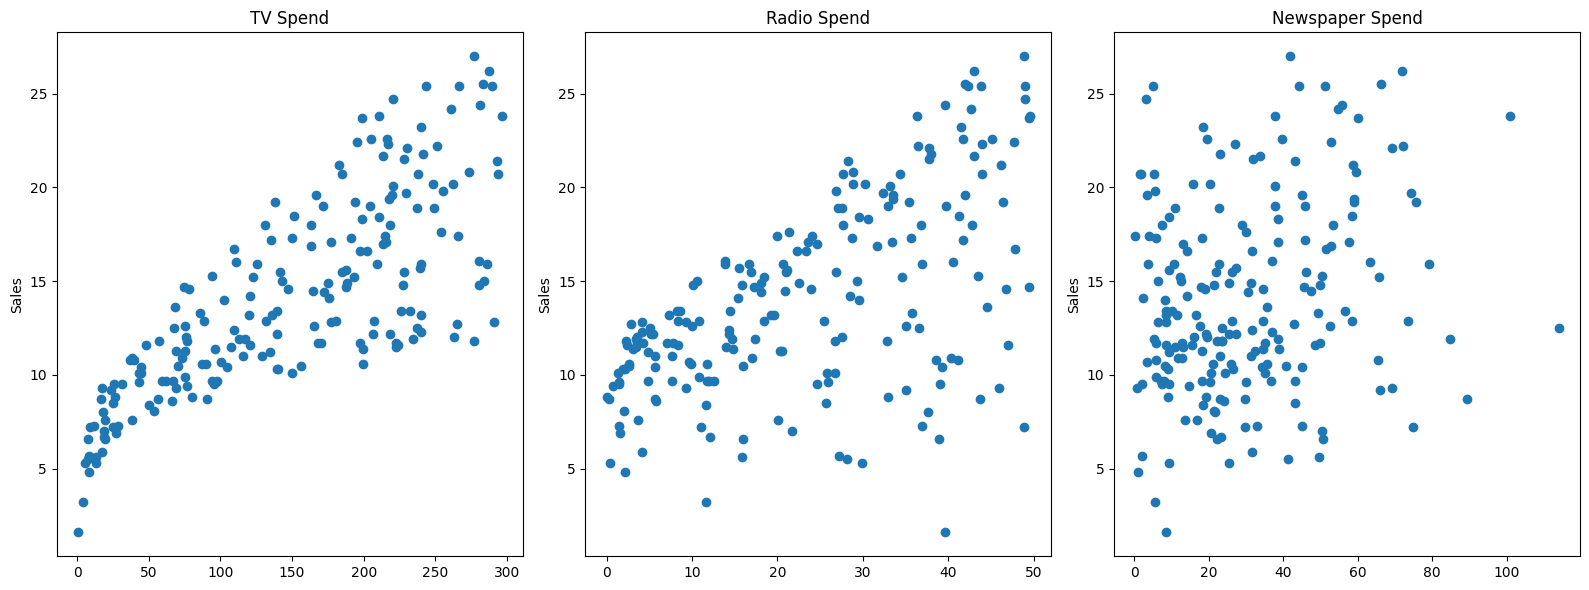

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

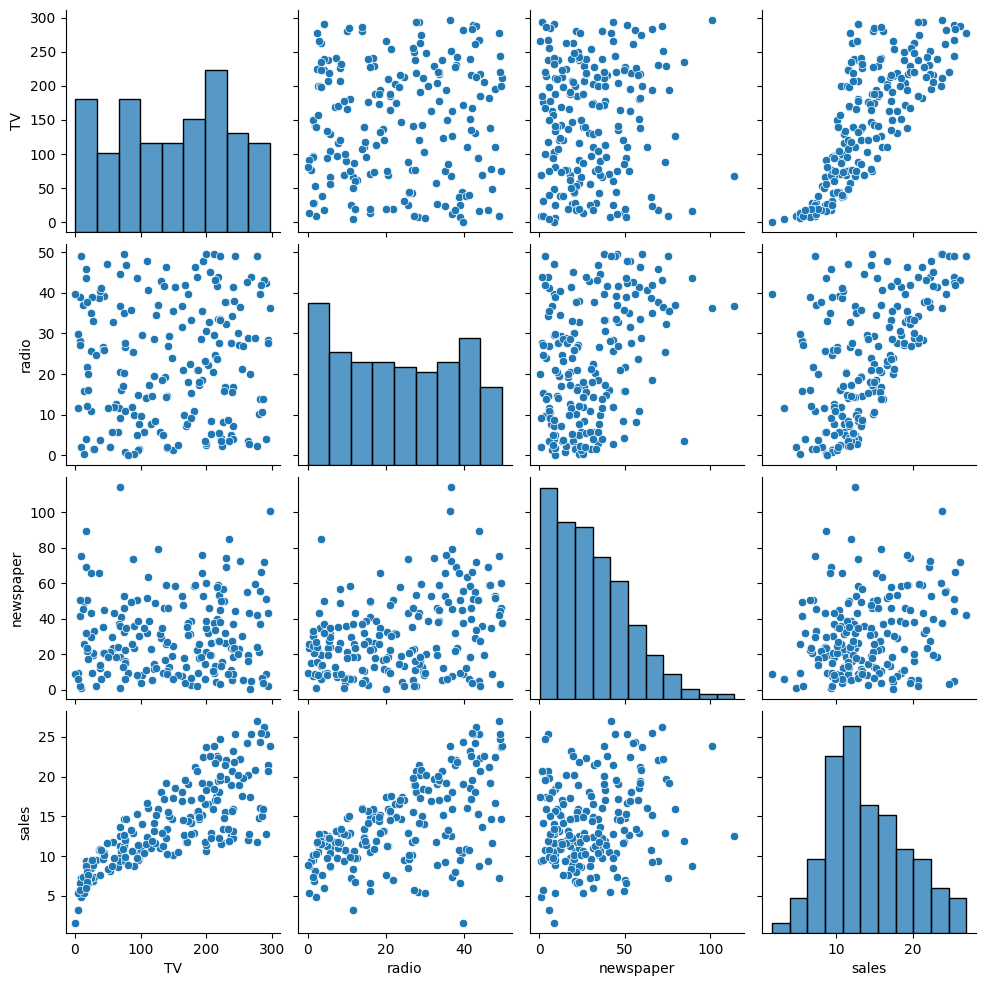

In [5]:
sns.pairplot(df)

In [6]:
X = df.drop('sales', axis=1)

In [7]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Create the model
model = LinearRegression()

In [13]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [14]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [15]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [16]:
tests_prediction = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

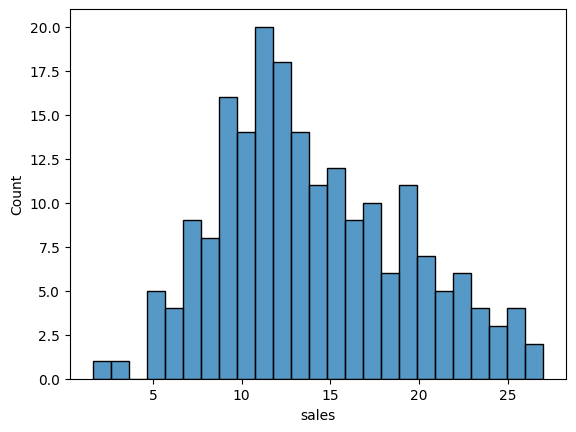

In [19]:
sns.histplot(data=df, x=df['sales'], bins=25)

In [20]:
mean_absolute_error(y_test, tests_prediction)

1.213745773614481

In [21]:
mean_squared_error(y_test, tests_prediction)

2.298716697886379

In [22]:
# RMSE
np.sqrt(mean_squared_error(y_test, tests_prediction))

np.float64(1.5161519375993882)

In [23]:
# Residual analysis
test_residuals = y_test - tests_prediction
test_residuals.head()

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
Name: sales, dtype: float64

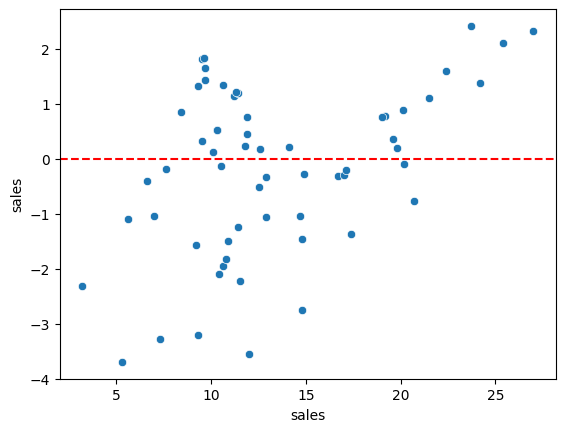

In [24]:
sns.scatterplot(data=df, x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

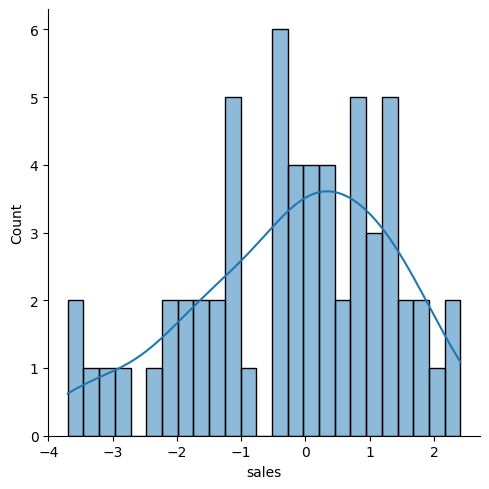

In [25]:
sns.displot(test_residuals, bins=25, kde=True)

In [26]:
import scipy as sp

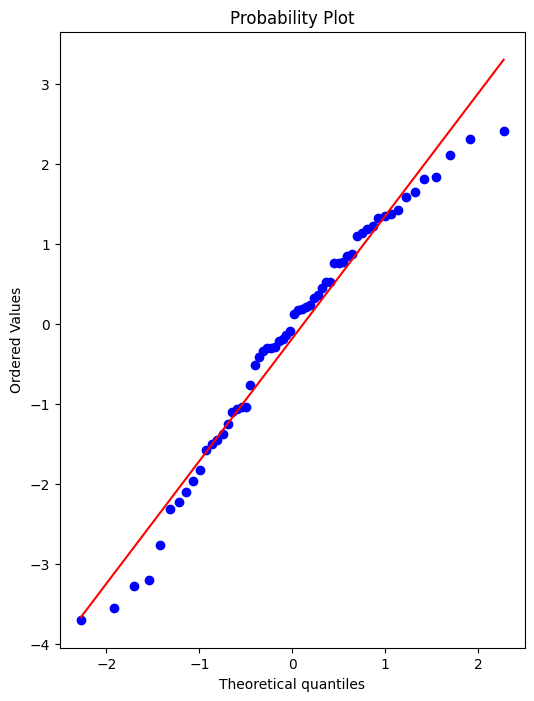

In [27]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
# probplot returns the raw values if needed
_ = sp.stats.probplot(test_residuals, plot=ax)

In [28]:
# Deploy/save the model
final_model = LinearRegression()

In [29]:
final_model.fit(X, y)

LinearRegression()

In [30]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [31]:
y_hat = final_model.predict(X)

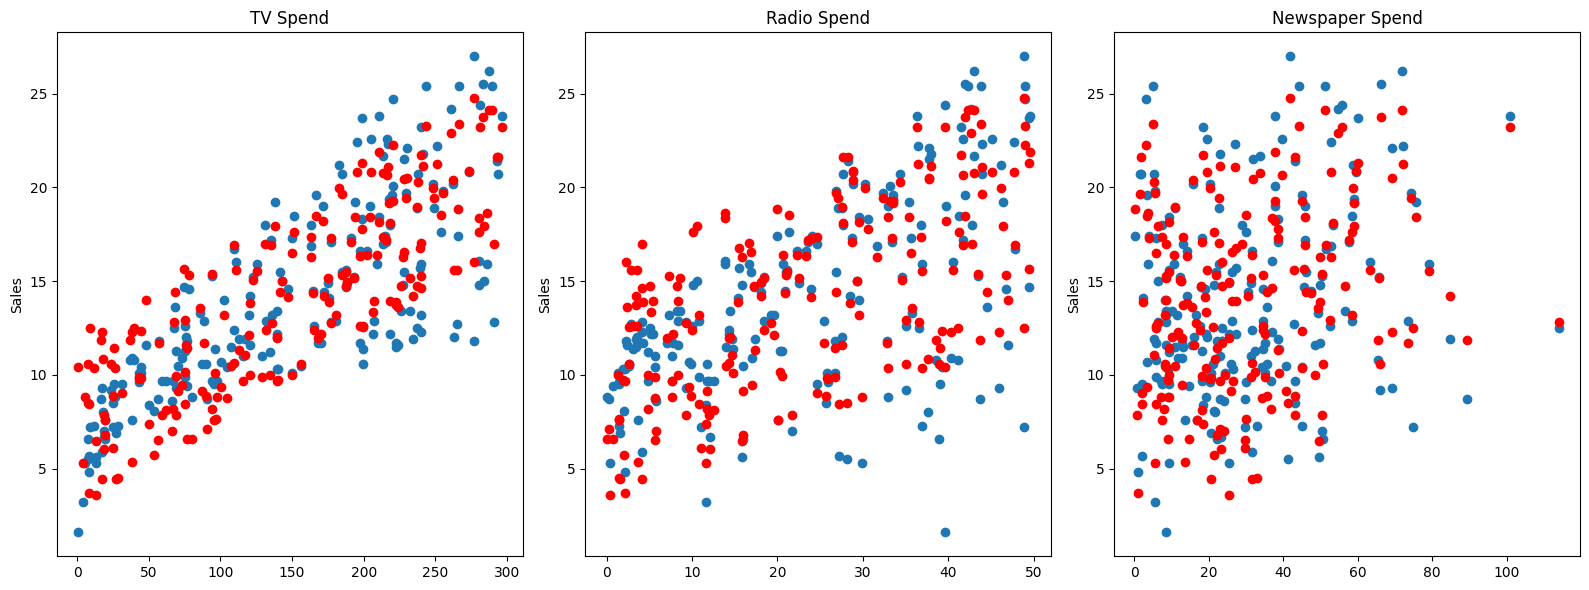

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()

In [33]:
from joblib import dump, load

In [34]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [35]:
loaded_model = load('final_sales_model.joblib')

In [36]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
# predict for a campaign
# 149- TV, 22 - radio, 12 newspaper
campaign = [[149, 22, 12]]

In [39]:
loaded_model.predict(campaign)

/usr/local/Cellar/jupyterlab/4.3.5_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [50]:
import os
directory_path = '/Users/atewari/learn/MLB/regression-analysis/data'
# files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
# files
os.listdir(directory_path)

['Advertising.csv']

In [62]:
from pathlib import Path

# Path to your directory
directory_path = os.getcwd()
target_dir = os.path.join(directory_path, "data")
# List all files (non-recursive)
files = ['data/' + f for f in os.listdir(target_dir) if os.path.isfile(os.path.join(target_dir, f))]
files
# type(files)

['data/Advertising.csv']

In [63]:
type(df.columns)

pandas.core.indexes.base.Index

In [64]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
cat_columns = df.select_dtypes(include=['object']).columns
cat_columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [68]:
X = pd.get_dummies(df, columns=cat_columns, drop_first=True)
X.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply to each object column
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']):
    df_encoded[col] = encoder.fit_transform(df[col])
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [82]:
df_life = pd.read_csv('data/Life Expectancy Data.csv')
df_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [83]:
df_life.shape

(2938, 22)

In [84]:
df_life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [80]:
for col in df_life.columns:
    # print(df_life[col].unique())
    df_life[col] = df_life[col].fillna(df_life[col].mode()[0])

In [81]:
df_life.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [86]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [90]:
df_life.select_dtypes(include=['number']).columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')